## Downloading the dataset and Architecture of the model

In [13]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)   #Normalizing the data
x_test = tf.keras.utils.normalize(x_test, axis=1)

#building the model starts here
model = tf.keras.models.Sequential()         #feedforward model, no going backwards
model.add(tf.keras.layers.Flatten())         #This is the first layer, we are also flattening the 28*28 model to 1*784 flat layer to feed in the model
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))     #2nd layer, dense, with 128 neurons in the layer with activation function relu(rectify linear)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))     #3rd layer, same as 2nd layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))   #4th and final layer with 10 outputs
#model prepared

#now, paremeters for the training of the model
#This is where we pass the settings for actually optimizing/training the model we've defined.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=9)

Epoch 1/9
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2561 - acc: 0.9245
Epoch 2/9
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1029 - acc: 0.9682
Epoch 3/9
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0699 - acc: 0.9781
Epoch 4/9
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0525 - acc: 0.9832
Epoch 5/9
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0394 - acc: 0.9869
Epoch 6/9
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0307 - acc: 0.9896
Epoch 7/9
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0248 - acc: 0.9917
Epoch 8/9
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0207 - acc: 0.9930
Epoch 9/9
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0178 - acc: 0.9936


In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.1112 - acc: 0.9731
0.11120051752389408
0.9731


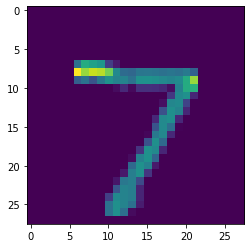

7


In [20]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0])
plt.show()

print(y_test[0])


In [21]:
model.save('epic_num_reader.model')   #saving the model

In [24]:
new_model = tf.keras.models.load_model('epic_num_reader.model')  #loading the model again in new_model

W0705 17:56:53.125527 140169918248768 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


In [36]:
predictions = new_model.predict(x_test)

In [38]:
print(predictions)

[[6.28890860e-14 6.45177141e-12 5.20109511e-10 ... 1.00000000e+00
  4.94470187e-14 7.49430309e-11]
 [4.68064259e-12 2.27033681e-07 9.99999762e-01 ... 5.62868632e-12
  3.66116439e-14 2.58027908e-17]
 [2.42656546e-12 9.99272406e-01 7.45063971e-07 ... 1.76669826e-04
  5.49857505e-04 2.06310510e-10]
 ...
 [1.24317131e-17 4.19261847e-10 2.69726309e-14 ... 1.23278276e-08
  1.15192265e-10 5.94881122e-08]
 [2.46367672e-05 5.64869085e-09 4.25796724e-11 ... 4.64179857e-06
  2.48190941e-06 1.58178470e-11]
 [1.01583932e-12 4.59068954e-14 2.26844867e-12 ... 2.93165832e-15
  4.60665577e-13 5.92416876e-15]]


In [39]:
import numpy as np

print(np.argmax(predictions[51]))

3


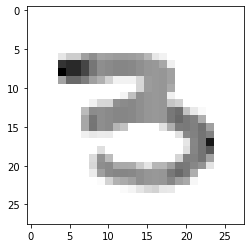

In [40]:
plt.imshow(x_test[51],cmap=plt.cm.binary)
plt.show()